# SunPy

So we are now at the heart of this event. Welcome to SunPy!

SunPy is a Python library for the analyis of solar data.

The SunPy project, from the document that created it exists to: facilitate and promote the use and development of a community-led, free and open-source solar data-analysis software based on the scientific Python environment.

So let us start with me giving you a brief overview of the SunPy library. Before my colleages give you a more deatiled look at specific parts!

In [1]:
import sunpy

So now we have it imported, let me show you a magicial world of SunPy maps.

In [2]:
sunpy.

SyntaxError: invalid syntax (<ipython-input-2-bd1b36fd2a15>, line 1)

Wait? Where are my functions? For SunPy the top level namespace is kept clean. Importing SunPy does not give you access to much. You need to import specific names. SciPy is the same. 

So, the place to start here is with the core SunPy data object. It is called Map. 

In [2]:
from sunpy.map import Map

We need data though! Luckly SunPy keeps a small collection of data for test purposes. These are downsized fits for a range of different data sources. 

In [4]:
#sunpy.AIA_171_IMAGE

AttributeError: 'module' object has no attribute 'data'

Map is similar to a NumPy N-D array. It is deisgned to be a gernic data container. It inheriets NumPy's ND-data array. It however was created to be aware of its spacial axes *i.e.,* it can tell you what the units the axes are in or the resoultion. Further it has a basic header that summarises the important data but also contains the full FITs header information if you require it at a later date. 

In [6]:
aia = Map(sunpy.AIA_171_IMAGE)

As you can see, it is quite simple. The Map Class was made to be as generic as possible and for specific intrumenants, it was sub-classed inorder to provide intrumenet-centric support. 

The Map class takes the input, in this case, a FITs file. It then processes the meta data (the FITs header) and decides what submap to reference. Here, it has chosen the only sensisible choice, AIAMAP.

If we print the output.

In [22]:
aia

SunPy AIAMap
---------
Observatory:	 SDO
Instrument:	 AIA_3
Detector:	 AIA
Measurement:	 171
Obs Date:	 2011-03-19T10:54:00.34
dt:		 1.999601
Dimension:	 [1024, 1024]
[dx, dy] =	 [2.400000, 2.400000]

array([[ 0.3125, -0.0625, -0.125 , ...,  0.625 , -0.625 ,  0.    ],
       [ 1.    ,  0.1875, -0.8125, ...,  0.625 , -0.625 ,  0.    ],
       [-1.1875,  0.375 , -0.5   , ..., -0.125 , -0.625 , -1.1875],
       ..., 
       [-0.625 ,  0.0625, -0.3125, ...,  0.125 ,  0.125 ,  0.125 ],
       [ 0.5625,  0.0625,  0.5625, ..., -0.0625, -0.0625,  0.    ],
       [ 0.5   , -0.125 ,  0.4375, ...,  0.6875,  0.6875,  0.6875]])

So there is the summary of the data we have. Where it is from, basic information of spatial and temporal scales and the raw data in brief form.

Much like ND arrays in NumPy, we have a range of attributes.

In [44]:
aia.submap(range(500,700),range(400,600))

AttributeError: can't set attribute

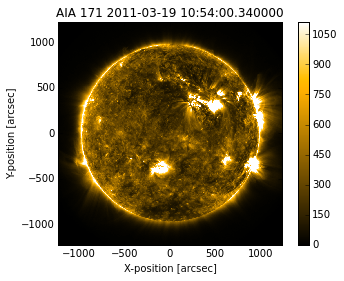

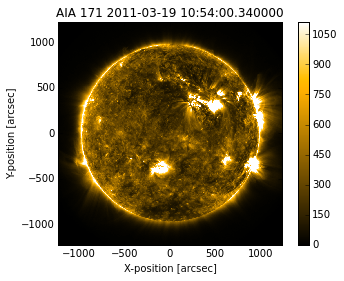

In [36]:
%matplotlib inline
aia.peek()

In [19]:
eit = Map(sunpy.EIT_195_IMAGE)

In [20]:
eit

SunPy EITMap
---------
Observatory:	 SOHO
Instrument:	 EIT
Detector:	 EIT
Measurement:	 195
Obs Date:	 2002-06-25T10:00:10.514Z
dt:		 13.298000
Dimension:	 [1024, 1024]
[dx, dy] =	 [2.620000, 2.620000]

array([[  1.04782506e+01,   1.09955692e+01,   9.69875809e+00, ...,
          6.44591131e+00,   6.84388972e+00,   8.17666471e+00],
       [  1.34515286e+01,   1.39325074e+01,   1.22043419e+01, ...,
          8.36423172e+00,   8.17287962e+00,   7.80404202e+00],
       [  6.71329664e+00,   6.75035238e+00,   5.79279833e+00, ...,
          1.73110578e+00,   1.51388818e+00,   3.25995539e-01],
       ..., 
       [  1.41302711e+00,   1.00180612e+00,   1.92805430e+00, ...,
          5.69094618e+00,   4.52399847e+00,   8.72813172e-01],
       [  2.15993542e+00,   1.40485954e+00,   1.57867304e+00, ...,
          3.69752711e+00,   4.61786222e+00,  -1.06641256e-02],
       [  1.38436802e+00,   1.18915205e+00,   1.06918108e+00, ...,
          4.22866468e+00,   4.52758785e+00,   3.43511790e-01]])

But looking at test data is boring! 
So let us quickly look at the Sun right now.

I won't show you SunPy downloading methods, but I will show you http://helioviewer.org/.

In [30]:
from sunpy.net.helioviewer import HelioviewerClient

hv = HelioviewerClient()
filepath = hv.download_jp2('2012/07/05 00:30:00', observatory='SDO', instrument='HMI', detector='HMI', measurement='continuum')
from sunpy.map import Map
hmi = Map(filepath)
hmi.submap([200,550],[-400,-200]).peek()

AttributeError: can't set attribute